В цьому ДЗ ми потренуємось будувати візуалізації з використанням бібліотеки `maplotlib` для візуалізації даних в `pandas.DataFrame`.

# Опис бізнес задачі та набору даних

Набір даних "Yulu" містить інформацію про попит на спільні електровелосипеди в Індії, що надаються провідним індійським постачальником мікромобільності Yulu. Ця компанія пропонує унікальні транспортні засоби для щоденних поїздок з метою усунення транспортних заторів в Індії та забезпечення безпечного, зручного та доступного рішення для пересування. Зони Yulu розташовані в оптимальних місцях, включаючи станції метро, автобусні зупинки, офісні простори, житлові райони та корпоративні офіси, щоб полегшити поїздки на перші та останні кілометри.

Останнім часом Yulu зіткнулася зі значними зниженнями доходів, тому компанія звернулася до консалтингової фірми з метою зрозуміти, від яких факторів залежить попит на ці спільні електровелосипеди, особливо на індійському ринку.

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів


0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

1. Завантажте дані з файла `yulu_rental.csv` у pandas.DataFrame `df`.

In [3]:
df = pd.read_csv('../data/yulu_rental.csv')

2. Виведіть

- перші 3 записи з набору даних
- типи даних в наборі даних
- розміри набору даних

In [35]:
display(df.head(3), df.dtypes, df.shape)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01


datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
date                  object
dtype: object

(10886, 13)

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.
Наша колонка тепер стане таймпстемпом і для неї став доступний функціонал, описаний тут

https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html

Наприклад, ми можемо легко виокремити дату, день тижня, чи це робочий день, чи ні.

In [7]:
df['datetime'] = pd.to_datetime(df.datetime)

3. З допомогою matplotlib побудуйте найпростіший лінійний графік кількості зареєстрованих користувачів (`registered`) на кожну годину.

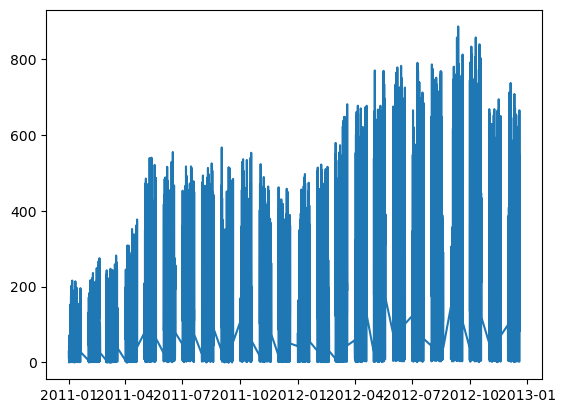

In [9]:
x = df['datetime']
y =  df['registered']
plt.plot(x, y)
plt.show();

Має вийти щось таке:
![](https://drive.google.com/uc?export=view&id=1WX6s9qmiwq_1TSHQtRX0bPL8sT6Gw2BH)

4. Графік виглядає так собі, правда? Давайте загрегуємо дані по дням. Для цього запустіть наступний код аби створити колонку "дата" (без часу) і після цього напишіть самостійно код, аби загрегувати дані і отримати кількість зарестрованих клієнтів на день. Ваша фінальна структура (запишіть її в змінну `df_registered_by_date`) даних має містити дві колонки: дату і кількість зареєстрованих користувачів на цей день.

In [11]:
df['date'] = df.datetime.dt.date

In [13]:
df_registered_by_date = pd.DataFrame(df.groupby("date").registered.sum()).reset_index()

In [15]:
df_registered_by_date

,date,registered
0,2011-01-01,654
1,2011-01-02,670
2,2011-01-03,1229
3,2011-01-04,1454
4,2011-01-05,1518
...,...,...
451,2012-12-15,4280
452,2012-12-16,3248
453,2012-12-17,4373
454,2012-12-18,5124


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1DL7Y-R7_CBWNlQNAnMyAoU8hR2MdF5v7)


5. Тепер побудуйте лінійний графік з matplotlib для даних в `df_registered_by_date`.

  Додайте наступну частину до графіку аби зробити підписи за віссю ОХ більш читаємими

  `plt.xticks(rotation=45, ha='right')`

  Після побудови графіку проаналізуйте його та напишіть, які тенденції щодо зміни кількості зареєстрованих користувачів в часі ви бачите і чому так може бути?

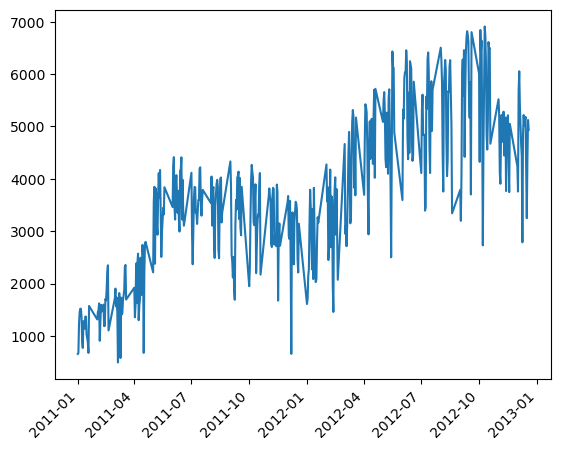

In [21]:
x = df_registered_by_date['date']
y =  df_registered_by_date['registered']
plt.plot(x, y)
plt.xticks(rotation=45, ha='right')
plt.show()

Загалом, кількість зареєстрованих користувачів щороку збільшується. Зважаючи на роки, можемо припустити, що це пов'язано з досить активним розвитком технологій і збільшенням кількості людей, які активно користуються мобільними застосунками. З точки зору бізнесу, це може свідчити про збільшення прихильності клієнтів саме до компаії Yulu. Оскільки, здебільшого, саме зареєстровані користувачі повертаються до сервісу вдруге та користуються послугами компанії набагато частіше за звичайних. 
Після максимального значення в жовтні 2012 року показник кількості зареєстрованих користувачів зменшився у січні 2013 року. З цього графіку важко зрозуміти, чому так відбулося. Можливо варто детальніше розглянути погодні умови в той період, адже вони можуть прямо впливати на бажання людей користуватися саме таким видом транспорту.

6. Побудуйте графік розсіювання (scatterplot) між температурою і тим, як вона відчувається (atemp). Поставте прозорість точок 0.2. Додайте підписи до осей Х ат У. Опишіть свої спостереження з цього графіку. Які висновки можна зробити? Що дивного бачите?

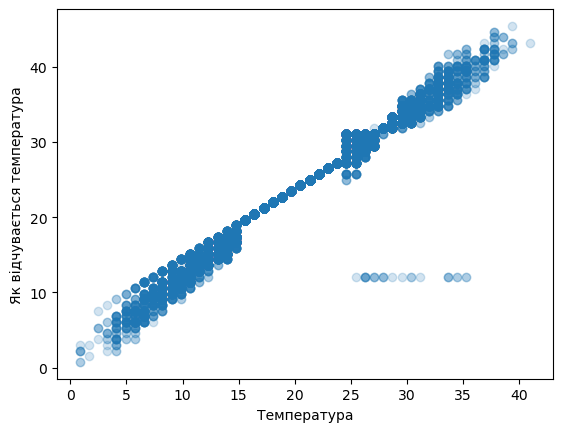

In [19]:
x = df.temp
y = df.atemp
plt.scatter(x, y, alpha=0.2);
plt.xlabel("Температура")
plt.ylabel("Як відчувається температура")
plt.show()

  Очікуваний графік:
![](https://drive.google.com/uc?export=view&id=13Mi6AGPUh5aQ5YEZjrlkQPuFcNzeeppB)


Здебільшого відчуття людей дуже точно збігаються з реальною температурою повітря. Проте це трошки гірше працює з температурою від 20-ти до орієнтовно 27-ми градусів. Дехто відчуває реальну температру 0 градусів як дещо вищу.
Цілком передбачувано, що за температури від 0 до 5-ти градусів люди нечасто користувалися сервісом, тому і даних щодо температури у цьому проміжку дуже мало.
Дуже дивно, що температуру від 26-ти до 36-ти градусів за Цельсієм деякі люди відчувають як 12 градусів.